# Carte de comparaison des différentes contributions des longueurs d'ondes


In [10]:
import os
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# from spectral_analysis_functions import *
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np

## Load des données pour une image

In [11]:
U_kmin5_kmax15 = np.load('U_BF_kmin5_kmax15.npy')
V_kmin5_kmax15 = np.load('V_BF_kmin5_kmax15.npy')

lat_kmin5_kmax15=np.load('lat_BF_kmin5_kmax15.npy')
lon_kmin5_kmax15=np.load('lon_BF_kmin5_kmax15.npy')

C_kmin5_kmax15=np.load('C_BF_kmin5_kmax15.npy')


U_kmin15_kmax35 = np.load('U_BF_kmin15_kmax35.npy')
V_kmin15_kmax35 = np.load('V_BF_kmin15_kmax35.npy')

lat_kmin15_kmax35=np.load('lat_BF_kmin15_kmax35.npy')
lon_kmin15_kmax35=np.load('lon_BF_kmin15_kmax35.npy')

C_kmin15_kmax35=np.load('C_BF_kmin15_kmax35.npy')

U_kmin35_kmax45 = np.load('U_BF_kmin35_kmax45.npy')
V_kmin35_kmax45 = np.load('V_BF_kmin35_kmax45.npy')

lat_kmin35_kmax45=np.load('lat_BF_kmin35_kmax45.npy')
lon_kmin35_kmax45=np.load('lon_BF_kmin35_kmax45.npy')

C_kmin35_kmax45=np.load('C_BF_kmin35_kmax45.npy')

In [12]:
# Fonction de filtrage par magnitude
def filter_vectors(lon, lat, U, V, C, threshold):
    magnitude = np.sqrt(U**2 + V**2)
    mask = magnitude <= threshold
    return lon[mask], lat[mask], U[mask], V[mask], C[mask]
# Définir un seuil de magnitude
magnitude_threshold = 1.1  # Ajuster ce seuil en fonction des données

# Filtrage des vecteur
lon1, lat1, U1, V1, C1 = filter_vectors(lon_kmin5_kmax15, lat_kmin5_kmax15, U_kmin5_kmax15, V_kmin5_kmax15, C_kmin5_kmax15, magnitude_threshold)

lon2, lat2, U2, V2, C2 = filter_vectors(lon_kmin15_kmax35, lat_kmin15_kmax35, U_kmin15_kmax35, V_kmin15_kmax35, C_kmin15_kmax35, magnitude_threshold)
lon3, lat3, U3, V3, C3 = filter_vectors(lon_kmin35_kmax45, lat_kmin35_kmax45, U_kmin35_kmax45, V_kmin35_kmax45, C_kmin35_kmax45, magnitude_threshold)

## 1) Plot des données

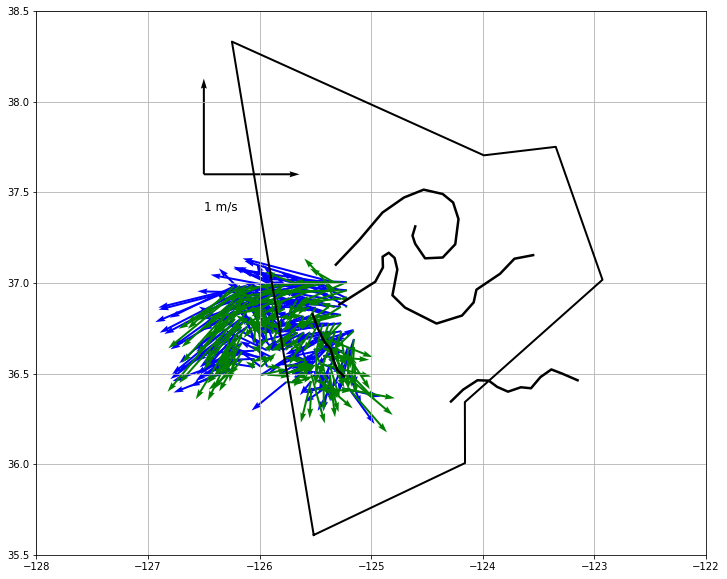

In [13]:
# Figure 

KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]



# Définir les coordonnées des points
front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]



thick=0.003
nb_pt=1
scale_quiver=7
width_front=2.5
# plt.subplot()
plt.figure(figsize=(12, 10))

# Tracé des lignes définies par les coordonnées KML
plt.plot(x, y, 'k',linewidth=2)
# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

# Tracer front1
x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k',linewidth=width_front)

# Tracer front2
x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k',linewidth=width_front)

# Tracer front3
x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k',linewidth=width_front)

# Tracer front4
x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k',linewidth=width_front)

##############################################################################################################


# plt.quiver(lon1[::nb_pt], lat1[::nb_pt], U1[::nb_pt], V1[::nb_pt], scale=scale_quiver, width=thick, color='magenta')
plt.quiver(lon2[::nb_pt], lat2[::nb_pt], U2[::nb_pt], V2[::nb_pt], scale=scale_quiver, width=thick, color='blue')
plt.quiver(lon3[::nb_pt], lat3[::nb_pt], U3[::nb_pt], V3[::nb_pt], scale=scale_quiver, width=thick, color='green')


plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black' , width=thick,label='Horizontal')
plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

plt.text(-126.5, 37.4, '1 m/s', fontsize=12,color='black')

plt.xlim(-128, -122)
plt.ylim(35.5, 38.5)
plt.grid(True)


In [14]:
print('lat kmin5 kmax 15',np.shape(lat1))
print('lat kmin15 kmax 35',np.shape(lat2))
# print('lat kmin35 kmax 45',lat3)

# Trouve les éléments communn dans les vecteurs
# entre min5_kmax15 et kmin15_kmax35

common_elements, id_1, id_2 = np.intersect1d(lat2, lat3, return_indices=True)
# common_elements, id_3, id_4 = np.intersect1d(lat2, lat3, return_indices=True)

print('indice 1',id_1)
print('indice 2',id_2)

lat kmin5 kmax 15 (103,)
lat kmin15 kmax 35 (239,)
indice 1 [  0 158 169 180 191 216 226 111 122 132 159 170 181 192  68  78 102 112
 123 133 160 171 182 193 217 227  23  31  60  69  79 113 124 134 146 172
 183 194 235  24  32  43  61  70  80  91 114 125 135 147 173 184 195 206
 228  25  33  44  62  71  81  92 115 126 136 148 174 185 196 207 229 236
  26  34  45  63  72  82  93 116 127 137 149 186 197 208 218 237  27  35
  46  73  83  94 103 128 138 150 161 187 198 209 219 238  28  36  47  54
  74  84  95 104 129 139 151 162 188 199 210 220  29  37  48  55  75  85
  96 105 130 140 152 163 189 200 211 221  38  49  56  76  86  97 106 117
 141 153 164 175 201 212 222 230  39  50  57  64  87  98 107 118 142 154
 165 176 202 213 223 231  40  51  65  88  99 108 119 143 155 166 177 203
 224 232  41  52  58  66  89 100 109 120 144 156 167 178 204 214 233]
indice 2 [  0 160 171 182 193 219 230 113 124 134 161 172 183 194  70  80 104 114
 125 135 162 173 184 195 220 231  23  32  62  71  81 115 1

In [15]:
# Ukm5kM15_commoon=U1[id_1]
# Vkm5kM15_commoon=V1[id_1]
# Ckm5kM15_common=C1[id_1]

Ukm15kM35_commoon=U2[id_1]
Vkm15kM35_commoon=V2[id_1]
Ckm15kM35_common=C2[id_1]

Ukm35kM45_commoon=U3[id_2]
Vkm35kM45_commoon=V3[id_2]
Ckm35kM45_common=C3[id_2]

lat_common=lat2[id_1]
lon_common=lon2[id_1]

# print('verif taille 1',np.shape(Ukm5kM15_commoon))
# print('verif taille 2',np.shape(Ukm15kM35_commoon))

print('verif taille 1',np.shape(Ukm15kM35_commoon))

print('verif taille 2',np.shape(Ukm35kM45_commoon))
print('lat',np.shape(lat_common))


# U_diff=np.abs(Ukm15kM35_commoon-Ukm5kM15_commoon)
# V_diff=np.abs(Vkm15kM35_commoon-Vkm5kM15_commoon)
# C_diff=np.abs(Ckm15kM35_common-Ckm5kM15_common)

# Courtes - longues

# U_diff=(Ukm15kM35_commoon-Ukm5kM15_commoon)
# V_diff=(Vkm15kM35_commoon-Vkm5kM15_commoon)
# C_diff=(Ckm15kM35_common-Ckm5kM15_common )

U_diff=(Ukm35kM45_commoon-Ukm15kM35_commoon)
V_diff=(Vkm35kM45_commoon-Vkm15kM35_commoon)
C_diff=(Ckm35kM45_common-Ckm15kM35_common )


print('C',np.shape(C_diff))

# ptit - grand
# print('U_diff',U_diff)
# print('V_diff',V_diff)

print('lat',lat_common)
print('lon',lon_common)

verif taille 1 (197,)
verif taille 2 (197,)
lat (197,)
C (197,)
lat [ 0.         36.4129141  36.41408575 36.41523143 36.41635115 36.41851264
 36.41955442 36.45299194 36.45426949 36.45552105 36.45794619 36.45911975
 36.46026731 36.46138885 36.49263679 36.49402049 36.49670987 36.49801554
 36.49929517 36.50054878 36.50297788 36.50415336 36.5053028  36.50642618
 36.50859475 36.50963994 36.53033078 36.53184692 36.53623918 36.53765119
 36.53903716 36.54303873 36.54432046 36.54557611 36.54680569 36.54918659
 36.5503379  36.55146312 36.55570291 36.57533282 36.57685143 36.57834398
 36.58125086 36.58266518 36.58405341 36.58541555 36.58806152 36.58934534
 36.59060305 36.59183463 36.59421942 36.59537261 36.59649967 36.59760058
 36.59972394 36.62033442 36.62185552 36.6233505  36.62626213 36.62767876
 36.62906926 36.63043362 36.63308391 36.63436982 36.63562958 36.63686318
 36.63925186 36.64040694 36.64153584 36.64263854 36.64476538 36.6457895
 36.66533561 36.66685918 36.66835661 36.67127298 36.67269

## 2) Plot vecteur différence


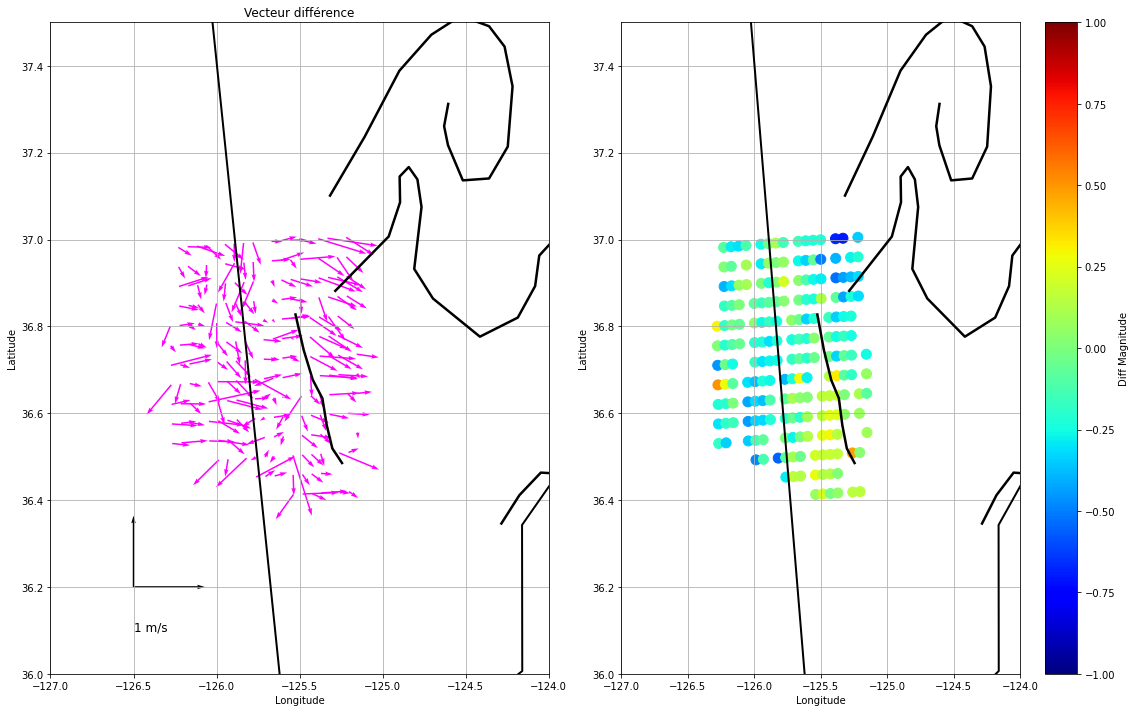

In [22]:
# Figure 

KML = [-125.5154580984717,35.60918144273914,0, -124.1598348200598,36.00632011592869,0, -124.1611160975969,36.34271033966335,0, -122.9280238314868,37.01787765651094,0, -123.3466687946642,37.75153911575246,0, -123.990921381546,37.70457834777174,0, -126.2484625922921,38.33213496721693,0, -125.5154580984717,35.60918144273914,0]
kml = [KML[i:i+3] for i in range(0, len(KML), 3)]
x = [point[0] for point in kml]
y = [point[1] for point in kml]



# Définir les coordonnées des points
front1 = [
    [-125.285339, 36.881818], [-124.963989, 37.006939], [-124.895325, 37.085858], 
    [-124.898071, 37.144993], [-124.84314, 37.166883], [-124.790955, 37.138425], 
    [-124.766235, 37.074902], [-124.810181, 36.93233], [-124.697571, 36.86424], 
    [-124.414673, 36.776292], [-124.186707, 36.820279], [-124.082336, 36.892801], 
    [-124.057617, 36.96306], [-123.84613, 37.050793], [-123.717041, 37.134045], 
    [-123.5495, 37.15375]
]

front2 = [
    [-125.316925, 37.101194], [-125.108185, 37.236889], [-124.899445, 37.388709], 
    [-124.707184, 37.471588], [-124.530029, 37.515172], [-124.359741, 37.491204], 
    [-124.266357, 37.444335], [-124.218292, 37.352693], [-124.247131, 37.213925], 
    [-124.359741, 37.140614], [-124.51767, 37.136235], [-124.606934, 37.217206], 
    [-124.63028, 37.260938], [-124.60556, 37.312291]
]

front3 = [
    [-124.285583, 36.346103], [-124.177094, 36.411336], [-124.048004, 36.463263], 
    [-123.946381, 36.461054], [-123.872223, 36.426808], [-123.774719, 36.400284], 
    [-123.659363, 36.424598], [-123.568726, 36.419072], [-123.483582, 36.480932], 
    [-123.386078, 36.522881], [-123.288574, 36.499701], [-123.151245, 36.463263]
]

front4 = [
    [-125.524979, 36.827424], [-125.47554, 36.745487], [-125.420609, 36.67668], 
    [-125.36293, 36.634264], [-125.336838, 36.572527], [-125.303192, 36.519018], 
    [-125.244827, 36.485349]
]



thick=0.003
nb_pt=1
scale_quiver=7
width_front=2.5
# plt.subplot()
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
# Tracé des lignes définies par les coordonnées KML
axs[0].plot(x, y, 'k',linewidth=2)
# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

# Tracer front1
x1, y1 = extract_coords(front1)
axs[0].plot(x1, y1, 'k', linewidth=2.5)

# Tracer front2
x2, y2 = extract_coords(front2)
axs[0].plot(x2, y2, 'k', linewidth=2.5)

# Tracer front3
x3, y3 = extract_coords(front3)
axs[0].plot(x3, y3, 'k', linewidth=2.5)

# Tracer front4
x4, y4 = extract_coords(front4)
axs[0].plot(x4, y4, 'k', linewidth=2.5)

##############################################################################################################


axs[0].quiver(lon_common, lat_common, U_diff, V_diff, scale=scale_quiver, width=thick, color='magenta')


axs[0].quiver(-126.5, 36.2, 1, 0, scale=scale_quiver, color='black' , width=thick,label='Horizontal')
axs[0].quiver(-126.5, 36.2, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

axs[0].text(-126.5, 36.1, '1 m/s', fontsize=12,color='black')

axs[0].set_xlim(-127, -124)
axs[0].set_ylim(36, 37.5)
axs[0].set_xlabel("Longitude")
axs[0].set_ylabel("Latitude")
axs[0].set_title("Vecteur différence")


axs[0].grid(True)

##############################################################################################################
axs[1].plot(x, y, 'k',linewidth=2)
# Tracer front1
x1, y1 = extract_coords(front1)
axs[1].plot(x1, y1, 'k', linewidth=2.5)

# Tracer front2
x2, y2 = extract_coords(front2)
axs[1].plot(x2, y2, 'k', linewidth=2.5)

# Tracer front3
x3, y3 = extract_coords(front3)
axs[1].plot(x3, y3, 'k', linewidth=2.5)

# Tracer front4
x4, y4 = extract_coords(front4)
axs[1].plot(x4, y4, 'k', linewidth=2.5)


# lon2d,lat2d=np.meshgrid(lon_common,lat_common)
# C_diff_plot=np.tile(C_diff,(61,1))

# lon_2d = lon2d[1:, 1:]
# lat_2d = lat2d[1:, 1:]
# C_2d = C_diff_plot[1:, 1:]

# # Tracer le pcolor dans le deuxième subplot
# pcm = axs[1].pcolormesh(lon_2d, lat_2d, C_2d, cmap='RdBu', shading='auto')


# Tracé du second subplot avec scatter
sc = axs[1].scatter(lon_common, lat_common, c=C_diff, s=100, alpha=1, cmap='jet', vmin=-1, vmax=1)

cbar = fig.colorbar(sc, ax=axs[1], label='Diff Magnitude')



# Configuration des limites et labels du pcolor
axs[1].set_xlim(-127, -124)
axs[1].set_ylim(36, 37.5)
# axs[1].set_title("Diff magnitude
axs[1].set_xlabel("Longitude")
axs[1].set_ylabel("Latitude")
axs[1].grid(True)

# Afficher la figure
plt.tight_layout()
plt.show()



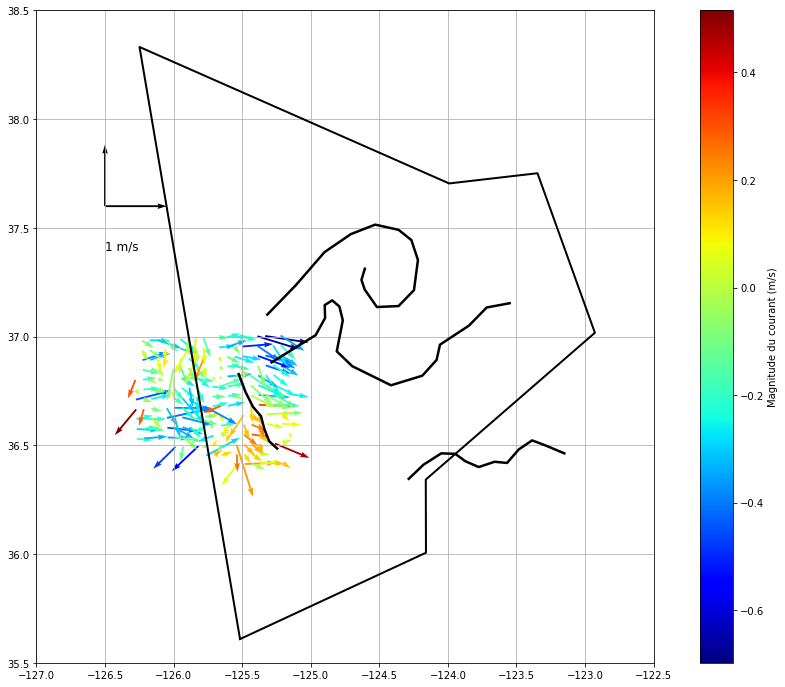

In [23]:
# Autre exemple
thick = 0.003
nb_pt = 1
scale_quiver = 10
width_front = 2.5

plt.figure(figsize=(14, 12))

# Tracé des lignes définies par les coordonnées KML
plt.plot(x, y, 'k', linewidth=2)

# Fonction pour extraire les coordonnées x et y
def extract_coords(front):
    x_coords = [point[0] for point in front]
    y_coords = [point[1] for point in front]
    return x_coords, y_coords

# Tracer les fronts
x1, y1 = extract_coords(front1)
plt.plot(x1, y1, 'k', linewidth=width_front)

x2, y2 = extract_coords(front2)
plt.plot(x2, y2, 'k', linewidth=width_front)

x3, y3 = extract_coords(front3)
plt.plot(x3, y3, 'k', linewidth=width_front)

x4, y4 = extract_coords(front4)
plt.plot(x4, y4, 'k', linewidth=width_front)
# Tracer les vecteurs de courant avec magnitudes colorées
q1 = plt.quiver(lon_common,lat_common,U_diff,V_diff,C_diff,scale=scale_quiver, width=thick, cmap='jet')

# Ajouter une colorbar
cbar = plt.colorbar(q1, orientation='vertical', pad=0.06)
cbar.set_label('Magnitude du courant (m/s)')
# Afficher la flèche horizontale de référence
plt.quiver(-126.5, 37.6, 1, 0, scale=scale_quiver, color='black', width=thick, label='Horizontal')

# Afficher la flèche verticale de référence
plt.quiver(-126.5, 37.6, 0, 1, scale=scale_quiver, color='black', width=thick, label='Vertical')

plt.text(-126.5, 37.4, '1 m/s', fontsize=12, color='black')

plt.xlim(-127, -122.5)
plt.ylim(35.5, 38.5)

# plt.savefig('Current_map_2704_13062024.png')
plt.grid(True)

plt.show()